In [4]:
import torch

In [5]:
import torch

# 참의 계수
w_true = torch.Tensor([1, 2, 3])

# X 데이터 준비. 절편을 회귀 계수에 포함시키기 위해
# X의 최초 차원에 1을 추가해둔다
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)

# 참의 게수와 각 X의 내적을 행렬과 벡터의 곱으로 모아서 계산
y = torch.mv(X, w_true) + torch.randn(100) * 0.5

# 기울기 하강으로 최적화하기 위해 파라미터 Tensor를
# 난수로 초기화해서 생성
w = torch.randn(3, requires_grad=True)

# 학습률
gamma = 0.1

In [6]:
# 경사 하강법으로 파라미터를 최적화함

# 손실 함수의 로그
losses = []

# 100회 반복
for epoc in range(100):
    # 전회의 backward 메서드로 계산된 경사 값을 초기화
    w.grad = None

    # 선형 모델으로 y 예측 값을 계산
    y_pred = torch.mv(X, w)

    # MSE loss와 w에 의한 미분을 계산
    loss = torch.mean((y - y_pred)**2)
    loss.backward()

    # 경사를 갱신한다
    # w를 그대로 대입해서 갱신하면 다른 Tensor가 돼서
    # 계산 그래프가 망가진다. 따라서 data만 갱신한다
    w.data = w.data - gamma * w.grad.data

    # 수렴 확인을 위한 loss를 기록해둔다
    losses.append(loss.item())

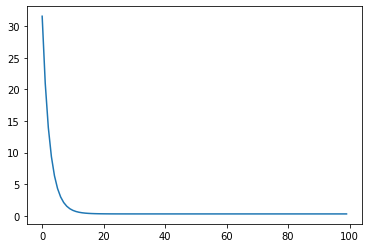

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [8]:
w

tensor([1.0137, 1.9952, 3.0771], requires_grad=True)

In [9]:
from torch import nn, optim
from sklearn.datasets import load_iris
iris = load_iris()

# iris는 (0,1,2)의 세 개 클래스를 분류하는 문제이므로
# (0,1)의 두 개 클래스 데이터만 사용한다
# 원래는 교육용과 테스트용으로 나누어야 하지만 여기선 생략한다
X = iris.data[:100]
y = iris.target[:100]

# NumPy의 ndarray를 PyTorch의 Tensor로 변환
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)